In [64]:
%matplotlib inline
from google.colab import files
uploaded = files.upload()
import matplotlib.pyplot as plt
import pandas as pd

Saving Arrests.csv to Arrests (3).csv


**The goal of this project is to predict, according to your background information if you will be released upon being arrested for posession of cannabis in the USA. The dataset is pulled from:**

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("darkgrid")
df = pd.read_csv('Arrests.csv')
df.head()

,Unnamed: 0,released,colour,year,age,sex,employed,citizen,checks
0,1,Yes,White,2002,21,Male,Yes,Yes,3
1,2,No,Black,1999,17,Male,Yes,Yes,3
2,3,Yes,White,2000,24,Male,Yes,Yes,3
3,4,No,Black,2000,46,Male,Yes,Yes,1
4,5,Yes,Black,1999,27,Female,Yes,Yes,1


In [0]:

num_black_arrests = sum(df.colour.str.count('Black'))
num_white_arrests = sum(df.colour.str.count('White'))

total_arrests = num_black_arrests + num_white_arrests

num_women_arrests = sum(df.sex.str.count('Female'))
num_men_arrests = sum(df.sex.str.count('Male'))


num_black_released = (sum(df[df.colour=='Black'].released.str.count('Yes')))
num_white_released = (sum(df[df.colour=='White'].released.str.count('Yes')))

num_women_released = (sum(df[df.sex=='Female'].released.str.count('Yes')))
num_men_released = (sum(df[df.sex=='Male'].released.str.count('Yes')))

black_released_ratio = (num_black_released/num_black_arrests)
white_released_ratio = (num_white_released/num_white_arrests)

women_released_ratio = (num_women_released/num_women_arrests)
men_released_ratio = (num_men_released/num_men_arrests)




**With some simple analysis we can see that there are more white people arrested out of the dataset**

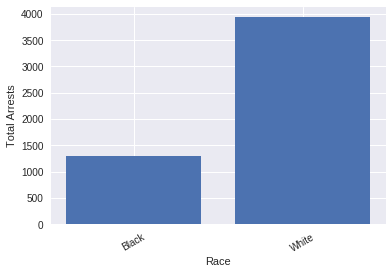

In [74]:
y = [num_black_arrests,num_white_arrests]
data_labels = ['Black', 'White']
index = np.arange(len(data_labels))

plt.bar(index,y)
plt.xticks(index, data_labels, rotation=30)
plt.xlabel('Race')
plt.ylabel('Total Arrests')
plt.show()


**However, as we can see, if you are black you are statiscally more likely to not be released. This can give us an indication that certain background details may affect your outcome. Therefore, we can build a model which can predict the outcome of your arrest.**

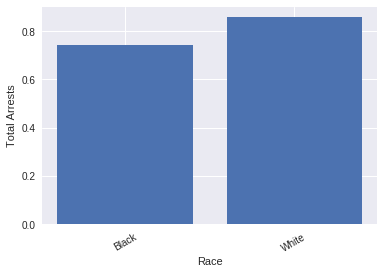

In [76]:
y = [black_released_ratio, white_released_ratio]
plt.bar(index,y)
plt.xticks(index, data_labels, rotation=30)
plt.xlabel('Race')
plt.ylabel('Total Arrests')
plt.show()


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_encoded = df.apply(le.fit_transform)

X = df_encoded.drop('released',axis=1)
y = df_encoded['released']

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2)

In [0]:
from sklearn.svm import SVC


scv_classifier = SVC(kernel='linear')
scv_classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
scv_classifier.score(X_test,y_test)

0.8164435946462715